In [2]:
%pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.3
    Uninstalling pip-24.3:
      Successfully uninstalled pip-24.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas numpy scikit-learn scipy graphviz shap matplotlib tensorflow sklearn2pmml setuptools tf2onnx scikeras


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Data Processing
import pandas as pd
import numpy as np

from shap import TreeExplainer
import shap.plots

import tf2onnx
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier

from sklearn2pmml import PMMLPipeline
from sklearn2pmml import sklearn2pmml


/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-28 18:29:12.657015: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 18:29:12.754665: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 18:29:12.830473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730132952.909663    5318 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730132952.932210    5318 cuda_blas.cc:1

In [5]:

# fraction = 0.25

# sampled_chunks = []
# chunk_size = 1000000

# for i, chunk in enumerate(pd.read_csv('traces/upb-hyccups2012/upb2012.csv', chunksize=chunk_size)):
#     if i > 3:
#         break
#     # Sample a fraction of rows from each chunk
#     sampled_chunk = chunk.sample(frac=fraction, random_state=1)
#     sampled_chunks.append(sampled_chunk)
# df = pd.concat(sampled_chunks, ignore_index=True)


df = pd.read_csv("traces/upb-hyccups2012/upb2012.csv", nrows=50000)

In [5]:
df

,messageId,messageSource,messageHopCount,oldRelayId,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newRelayId,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,0,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
1,1,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
2,2,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
3,3,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
4,4,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1281,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49996,1282,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49997,1283,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49998,1284,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222


In [6]:
successful_messages = pd.read_csv("traces/upb-hyccups2012/successful2012.csv", nrows=10000)

In [7]:
successful_messages

,messageId,lastRelay,destination
0,14,5,0
1,579,5,0
2,595,5,0
3,604,6,1
4,1176,6,1
...,...,...,...
9995,1797,4,0
9996,1798,4,0
9997,1291,4,0
9998,1864,4,0


In [7]:
df["usefulTransfer"] = np.nan
df

,messageId,messageSource,messageHopCount,oldRelayId,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newRelayId,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory,usefulTransfer
0,0,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
1,1,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
2,2,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
3,3,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
4,4,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1281,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49996,1282,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49997,1283,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49998,1284,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN


In [8]:
# make sure column is integer not float
df["usefulTransfer"] = pd.Series(dtype=np.int64)

for index, row in successful_messages.iterrows():
  message_id = row.iloc[0]
  last_relay = row.iloc[1]
  destination = row.iloc[2]

  reached_source = False
  queue = df[(df['messageId'] == message_id) & (df['newRelayId'] == last_relay)].index.tolist()
  visited = []
  while (True):
    if (len(queue) == 0):
       break

    curr_idx = queue.pop()
    visited.append(curr_idx)

    df_row = df.iloc[curr_idx]
    message_source = df_row.iloc[1]
    old_relay_id = df_row.iloc[3]

    if old_relay_id == message_source:
        break

    df.loc[curr_idx, "usefulTransfer"] = 1
    last_relay = old_relay_id


    for idx in df[(df['messageId'] == message_id) & (df['newRelayId'] == last_relay)].index.tolist():
       if (idx not in visited):
         queue.insert(0, idx)

df.loc[(df['usefulTransfer'] != 1), 'usefulTransfer'] = 0
df = df.drop(columns=['messageId', 'oldRelayId', 'newRelayId', 'messageSource'])
df['usefulTransfer'].value_counts()[1]


np.int64(2663)

In [9]:
df.to_csv('traces/upb-hyccups2012/with_result.csv', index=False)


In [10]:
positive_df = df.loc[df['usefulTransfer'] == 1]
negative_df = df.loc[df['usefulTransfer'] == 0].sample(len(positive_df))
balanced_df = pd.concat([positive_df, negative_df], ignore_index=True)
print(balanced_df.min())
print(balanced_df.max())
balanced_df

messageHopCount             0.000000
oldFriendWithDestination    0.000000
oldRelayBattery             0.128897
oldCommonCommunity          0.000000
oldDataMemory               0.045000
newFriendWithDestination    0.000000
newRelayBattery             0.128897
newCommonCommunity          0.000000
newDataMemory               0.000000
usefulTransfer              0.000000
dtype: float64
messageHopCount             6.000000
oldFriendWithDestination    1.000000
oldRelayBattery             0.964487
oldCommonCommunity          1.000000
oldDataMemory               0.808000
newFriendWithDestination    1.000000
newRelayBattery             0.984842
newCommonCommunity          1.000000
newDataMemory               0.813000
usefulTransfer              1.000000
dtype: float64


,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory,usefulTransfer
0,0,0,0.730968,1,0.047,1,0.637417,0,0.001,1.0
1,0,0,0.730968,1,0.047,1,0.637417,0,0.009,1.0
2,0,0,0.730968,1,0.047,1,0.637417,0,0.019,1.0
3,2,0,0.730968,0,0.047,0,0.637417,0,0.041,1.0
4,2,0,0.637417,0,0.108,0,0.730968,0,0.047,1.0
...,...,...,...,...,...,...,...,...,...,...
5321,3,1,0.128897,0,0.367,0,0.385189,0,0.376,0.0
5322,4,0,0.385189,0,0.572,0,0.240536,0,0.579,0.0
5323,2,0,0.730968,0,0.213,0,0.333218,0,0.161,0.0
5324,3,0,0.385189,0,0.572,0,0.240536,0,0.582,0.0


In [11]:
balanced_df['messageHopCount']

0       0
1       0
2       0
3       2
4       2
       ..
5321    3
5322    4
5323    2
5324    3
5325    2
Name: messageHopCount, Length: 5326, dtype: int64

In [12]:
# add preprocessing
preprocessed_df = balanced_df.drop(columns='usefulTransfer').copy()

minmax_columns = ['messageHopCount']
categorial_columns = ['oldFriendWithDestination', 'oldCommonCommunity', 'newFriendWithDestination', 'newCommonCommunity']
standard_columns = [col for col in preprocessed_df.select_dtypes(include=['float64', 'int64']).columns if col not in minmax_columns and col not in categorial_columns]


preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler((0,1)), minmax_columns),
        ('standard', StandardScaler(), standard_columns),
        ('onehotencoder', OneHotEncoder(), categorial_columns)
    ],
    remainder='passthrough',
)

preprocessed_df = preprocessor.fit_transform(preprocessed_df)
preprocessed_df


array([[ 0.        ,  1.29038851, -1.7867615 , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.29038851, -1.7867615 , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.29038851, -1.7867615 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.33333333,  1.29038851, -0.99227704, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5       , -0.18057684,  0.72591524, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33333333,  0.892419  , -1.39430532, ...,  0.        ,
         1.        ,  0.        ]])

In [13]:
X = balanced_df.copy().drop(columns=['usefulTransfer'])
result_df = pd.DataFrame(balanced_df['usefulTransfer'].copy().squeeze())
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(result_df)
print(X.shape)
print(y.shape)

(5326, 9)
(5326,)


/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Build the pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

rf_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_pipeline.predict(X_test)

# Create a PMML pipeline
pmml_pipeline = PMMLPipeline([('preprocessor', preprocessor),
    ('classifier', rf_classifier)])

pmml_pipeline.fit(X_train, y_train)

# Export the model to PMML
sklearn2pmml(pmml_pipeline, "model-rf.pmml")


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/sklearn2pmml/pipeline/__init__.py:72: UserWarning: y is missing target field name(s)
  warnings.warn("y is missing target field name(s)")


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       520
           1       0.87      0.90      0.88       546

    accuracy                           0.88      1066
   macro avg       0.88      0.88      0.88      1066
weighted avg       0.88      0.88      0.88      1066

Confusion Matrix:
[[445  75]
 [ 55 491]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base = svm.SVC(kernel='rbf')

# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_poly = GridSearchCV(base, param_grid, refit=True, cv=5)
grid_poly.fit(X_train, y_train)

best_svm = grid_poly.best_estimator_

# Build the pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_svm)
])

svm_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_pipeline.predict(X_test)

# Create a PMML pipeline
pmml_pipeline = PMMLPipeline([('preprocessor', preprocessor),
    ('classifier', best_svm)])

pmml_pipeline.fit(X_train, y_train)

# Export the model to PMML
sklearn2pmml(pmml_pipeline, "model-svm.pmml")


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/sklearn2pmml/pipeline/__init__.py:72: UserWarning: y is missing target field name(s)
  warnings.warn("y is missing target field name(s)")


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       520
           1       0.88      0.84      0.86       546

    accuracy                           0.86      1066
   macro avg       0.86      0.86      0.86      1066
weighted avg       0.86      0.86      0.86      1066

Confusion Matrix:
[[455  65]
 [ 89 457]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



clf = MLPClassifier(solver='lbfgs', activation="relu", alpha=1e-5,
                    hidden_layer_sizes=(64, 32), random_state=42, max_iter=500)


# Build the pipeline
neural_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

neural_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = neural_pipeline.predict(X_test)

# Create a PMML pipeline
pmml_pipeline = PMMLPipeline([('preprocessor', preprocessor),
    ('classifier', clf)])

pmml_pipeline.fit(X_train, y_train)

# Export the model to PMML
sklearn2pmml(pmml_pipeline, "model-neural.pmml")


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/sklearn2pmml/pipeline/__init__.py:72: UserWarning: y is missing target field name(s)
  warnings.warn("y is missing target field name(s)")
/home/seba/projects/mobemu/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_it

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       520
           1       0.85      0.93      0.89       546

    accuracy                           0.88      1066
   macro avg       0.89      0.88      0.88      1066
weighted avg       0.89      0.88      0.88      1066

Confusion Matrix:
[[432  88]
 [ 36 510]]


In [99]:
explainer = TreeExplainer(rf_classifier, feature_names=preprocessed_df)
shap_values = np.array(explainer.shap_values(X_test))

In [100]:
truncated_shap = shap_values[:20][:][:]
truncated_x = X_test.head(20).to_numpy()

In [101]:
truncated_shap

array([[[-1.63948618e-01,  1.63948618e-01],
        [ 9.67252158e-02, -9.67252158e-02],
        [-1.04088742e-02,  1.04088742e-02],
        [-9.01821067e-03,  9.01821067e-03],
        [ 6.62519676e-02, -6.62519676e-02],
        [ 3.19193831e-02, -3.19193831e-02],
        [ 5.86161230e-02, -5.86161230e-02],
        [ 1.26888423e-01, -1.26888423e-01],
        [-6.72671936e-02,  6.72671936e-02]],

       [[ 2.40205836e-01, -2.40205836e-01],
        [ 5.29730708e-02, -5.29730708e-02],
        [ 1.72961160e-02, -1.72961160e-02],
        [-1.28880987e-02,  1.28880987e-02],
        [ 1.50622924e-02, -1.50622924e-02],
        [ 1.14959340e-02, -1.14959340e-02],
        [-3.37513167e-01,  3.37513167e-01],
        [ 2.89466839e-02, -2.89466839e-02],
        [-1.04177594e-01,  1.04177594e-01]],

       [[ 2.65806846e-01, -2.65806846e-01],
        [ 2.35525634e-02, -2.35525634e-02],
        [ 1.29922193e-02, -1.29922193e-02],
        [-3.01506380e-03,  3.01506380e-03],
        [ 6.87827067e-03, -6

In [43]:
for i in np.where(y_test == 1)[0]:
    print(X_test.iloc[i])

messageHopCount             0.000000
oldFriendWithDestination    1.000000
oldRelayBattery             0.385189
oldCommonCommunity          0.000000
oldDataMemory               0.572000
newFriendWithDestination    1.000000
newRelayBattery             0.240536
newCommonCommunity          0.000000
newDataMemory               0.582000
Name: 1879, dtype: float64
messageHopCount             3.000000
oldFriendWithDestination    1.000000
oldRelayBattery             0.128897
oldCommonCommunity          0.000000
oldDataMemory               0.354000
newFriendWithDestination    1.000000
newRelayBattery             0.546740
newCommonCommunity          0.000000
newDataMemory               0.190000
Name: 555, dtype: float64
messageHopCount             0.000000
oldFriendWithDestination    0.000000
oldRelayBattery             0.128897
oldCommonCommunity          1.000000
oldDataMemory               0.362000
newFriendWithDestination    1.000000
newRelayBattery             0.240536
newCommonCommunity    

In [39]:
indices = np.where(y_test == 1)
indices

(array([   0,    4,    6,    8,   13,   14,   19,   20,   21,   25,   26,
          27,   28,   31,   32,   34,   36,   39,   40,   41,   43,   45,
          46,   47,   48,   56,   57,   58,   60,   62,   64,   66,   67,
          68,   70,   72,   73,   76,   77,   78,   80,   85,   86,   87,
          90,   91,   92,   94,   99,  100,  108,  111,  112,  114,  115,
         116,  118,  120,  121,  122,  123,  125,  128,  129,  135,  136,
         138,  140,  141,  142,  143,  145,  146,  147,  149,  151,  152,
         154,  155,  156,  157,  159,  160,  161,  162,  163,  164,  168,
         170,  171,  172,  175,  177,  178,  180,  182,  184,  185,  188,
         189,  190,  192,  194,  195,  199,  200,  202,  203,  204,  205,
         207,  208,  209,  210,  211,  213,  214,  215,  219,  220,  224,
         226,  227,  228,  230,  234,  235,  236,  238,  239,  240,  243,
         244,  245,  248,  249,  251,  253,  256,  258,  259,  260,  261,
         264,  266,  267,  268,  269, 

1


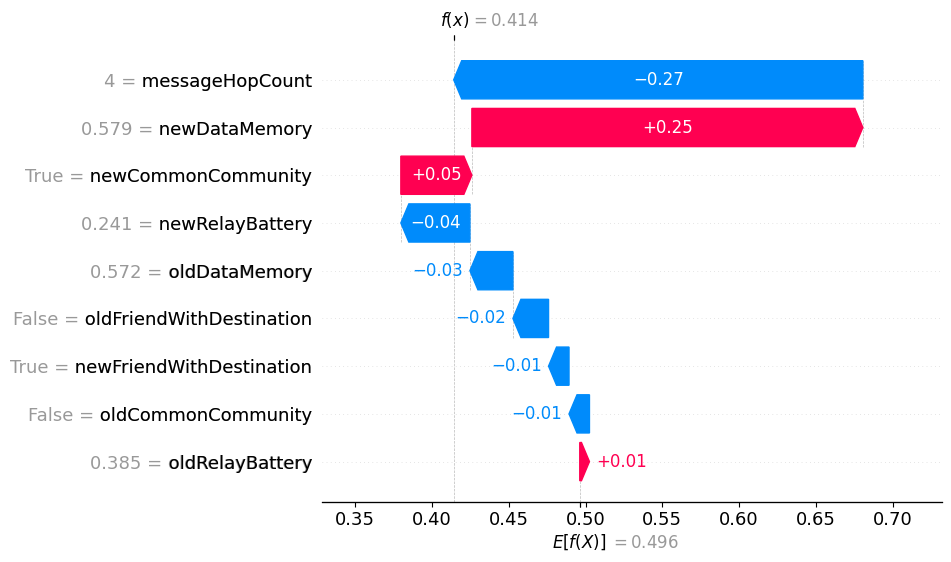

In [102]:

# desired_features = list(balanced_df.columns[:-1])
# for i in range(0, len(desired_features) - 1):
#     for j in range(i+1, len(desired_features)):
#         feature_indices = [i, j]
#         shap_values_subset = shap_values[:, feature_indices]
#         shap_values_subset
#         feat_subset = X_test[list(map(lambda f: desired_features[f], feature_indices))]
#         plt.figure()
#         shap.summary_plot(shap_values_subset, feat_subset, plot_type="bar")
#         display(plt.gcf())
idx = 78
print(y_pred[idx][0])
shap.plots.waterfall(explainer(X_test)[idx,:,y_pred[idx][0]])